<h1><strong><u>Logistic Model Test</u></strong></h1>

In [1]:
%%capture
%run DataPrep.ipynb

<h2><strong><u>Logistic Model Selection</u></strong></h2>

<h3><strong><u>Validation Curves</u></strong></h3>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ..........................................clf__C=10; total time=   0.0s
[CV] END ........................................clf__C=0.01; total time=   0.0s
[CV] END .........................................clf__C=0.1; total time=   0.0s
[CV] END ......................................clf__C=0.0001; total time=   0.0s
[CV] END .......................................clf__C=0.001; total time=   0.0s
[CV] END ...........................................clf__C=1; total time=   0.0s
[CV] END .......................................clf__C=0.001; total time=   0.0s
[CV] END ........................................clf__C=0.01; total time=   0.0s
[CV] END .........................................clf__C=0.1; total time=   0.0s
[CV] END ...........................................clf__C=1; total time=   0.0s
[CV] END ......................................clf__C=0.0001; total time=   0.0s
[CV] END ..........................................clf__C=10; total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.8s finished


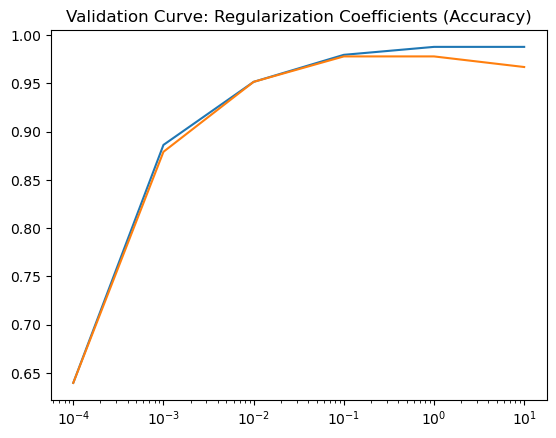

Exception ignored in: <function ResourceTracker.__del__ at 0x104311bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10299dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x108d89bc0>
Traceback (most recent call last

In [ ]:
pipeline = Pipeline(
    [
        ("scale", StandardScaler()),
        ("clf", LogisticRegression())
    ]
)
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__C",
                                                   param_range=alphas,
                                                   verbose=2,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Validation Curve: Regularization Coefficients (Accuracy)")
plt.semilogx(alphas, train_scores_mean)
plt.semilogx(alphas, validation_scores_mean)

<h3><strong><u>Cross-Validation Test</u></strong></h3>

In [2]:
pipeline = Pipeline(
    [
        ("scale", StandardScaler()),
        ("clf", LogisticRegression())
    ]
)
param_grid = {"clf__C": [0.1, 0.3, 0.5, 0.7, 0.9, 1]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
log_model = grid_search.best_estimator_
print(log_model)

def logistic_cv():
    return log_model

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .........................................clf__C=0.1; total time=   0.0s
[CV] END .........................................clf__C=0.3; total time=   0.0s
[CV] END .........................................clf__C=0.3; total time=   0.0s
[CV] END .........................................clf__C=0.5; total time=   0.0s
[CV] END .........................................clf__C=0.5; total time=   0.0s
[CV] END .........................................clf__C=0.5; total time=   0.0s
[CV] END .........................................clf__C=0.5; total time=   0.0s
[CV] END .........................................clf__C=0.5; total time=   0.0s
[CV] END .........................................clf__C=0.7; total time=   0.0s
[CV] END .........................................clf__C=0.7; total time=   0.0s
[CV] END .........................................clf__C=0.7; total time=   0.0s
[CV] END ........................................

<h4><strong><u>Findings From 'Model Selection' Section</u></strong></h4>
I found that a low amount of regularization seems to be ideal for this dataset as too much regularization will lead to underfitting. I chose a range from 0.1-1 to use in the Grid Search test and found C=0.5 as a good value for Logistic Regression model.

<h2><strong><u>Model Evaluation</u></strong></h2>

<h3><strong><u>Learning Curve Tests</u></strong></h3>

In [6]:
lc_dict = {}

In [8]:
for key, value in clf_metrics.items():
    logistic_train_sizes, logistic_train_scores, logistic_validation_scores = learning_curve(
        log_model,
        X_train,
        y_train,
        cv=5,  # Number of folds for cross-validation
        scoring=value,  # Metric to evaluate the model
        n_jobs=-1,  # Use all available CPU cores
    )

    # Calculate mean and standard deviation for scores
    logistic_train_scores_mean = np.mean(logistic_train_scores, axis=1)
    logistic_train_scores_std = np.std(logistic_train_scores, axis=1)
    logistic_validation_scores_mean = np.mean(logistic_validation_scores, axis=1)
    logistic_validation_scores_std = np.std(logistic_validation_scores, axis=1)

    # Calculate spread of data around the mean
    logistic_train_range_minus = logistic_train_scores_mean - logistic_train_scores_std
    logistic_train_range_plus = logistic_train_scores_mean + logistic_train_scores_std
    logistic_validation_range_minus = logistic_validation_scores_mean - logistic_validation_scores_std
    logistic_validation_range_plus = logistic_validation_scores_mean + logistic_validation_scores_std

    lc_dict[key] = [[logistic_train_scores_mean, logistic_validation_scores_mean],
                    [logistic_train_range_minus, logistic_train_range_plus], 
                    [logistic_validation_range_minus, logistic_validation_range_plus], 
                    logistic_train_sizes]

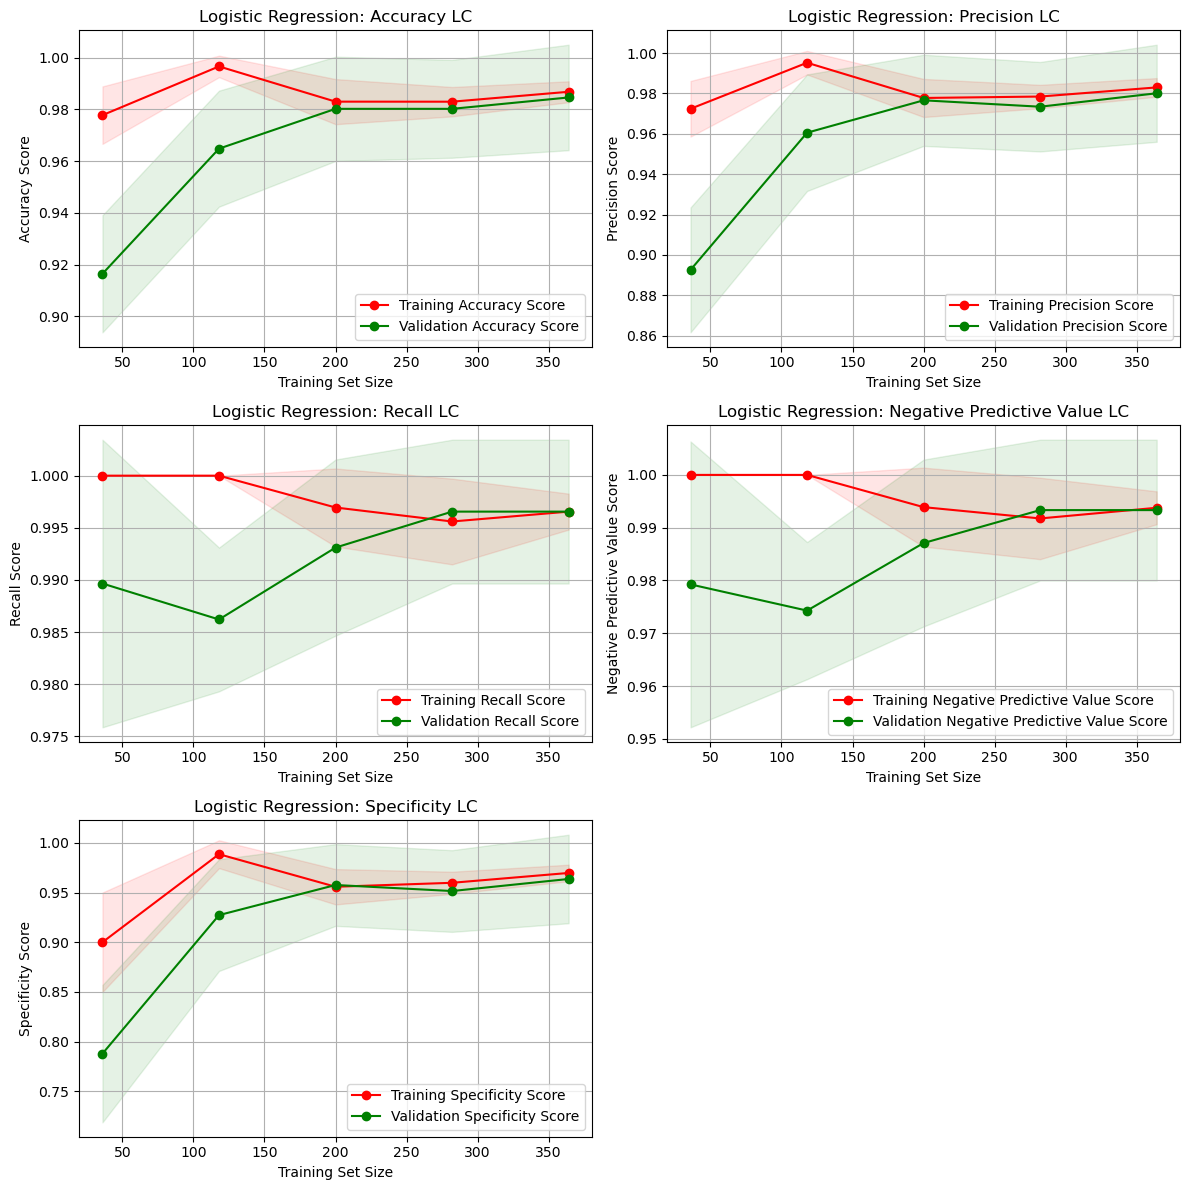

In [9]:
# Plot the learning curves
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the axes array for easier iteration
axs = axs.flatten()
count = 0
for key, value in lc_dict.items():
    axs[count].set_title(f"Logistic Regression: {key} LC")
    axs[count].set_xlabel("Training Set Size")
    axs[count].set_ylabel(f"{key} Score")
    axs[count].grid()

    axs[count].fill_between(value[3], value[1][0], value[1][1], alpha=0.1, color="r")
    axs[count].fill_between(value[3], value[2][0], value[2][1], alpha=0.1, color="g")
    axs[count].plot(value[3], value[0][0], 'o-', color="r", label=f"Training {key} Score")
    axs[count].plot(value[3], value[0][1], 'o-', color="g", label=f"Validation {key} Score")
    axs[count].legend(loc="best")
    count += 1
    
fig.delaxes(axs[count]) 

plt.tight_layout()
plt.show()

<h3><strong><u>Evaluation Metrics</u></strong></h3>

In [6]:
for key, value in clf_metrics.items():
    print(f"{key}")
    nb_training_values = cross_val_score(log_model, X_train, y=y_train, scoring=value, cv=5)
    print("CV Training Scores: ", nb_training_values)
    np_nb_training_values = np.array(nb_training_values)
    average = np.mean(np_nb_training_values)
    stDev = np.std(np_nb_training_values)
    print(f"Training Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV Training Scores:  [1.         0.98901099 0.94505495 1.         0.98901099]
Training Average and Standard Error:  0.98% ± 2.04% 

Precision
CV Training Scores:  [1.         0.98305085 0.93442623 1.         0.98305085]
Training Average and Standard Error:  0.98% ± 2.41% 

Recall
CV Training Scores:  [1.         1.         0.98275862 1.         1.        ]
Training Average and Standard Error:  1.00% ± 0.69% 

Negative Predictive Value
CV Training Scores:  [1.         1.         0.96666667 1.         1.        ]
Training Average and Standard Error:  0.99% ± 1.33% 

Specificity
CV Training Scores:  [1.         0.96969697 0.87878788 1.         0.96969697]
Training Average and Standard Error:  0.96% ± 4.45% 



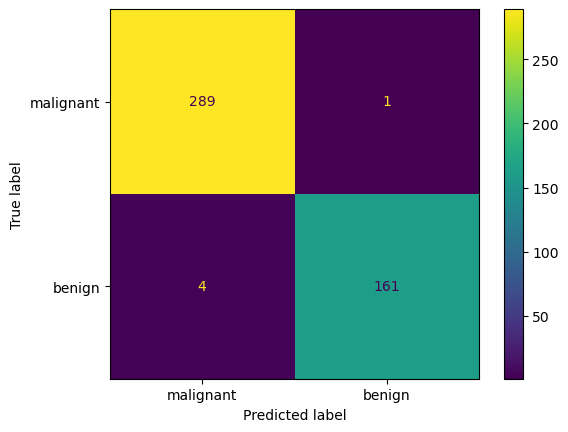

In [7]:
#Training Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_model, X_train, y_train, labels=['malignant', 'benign'])

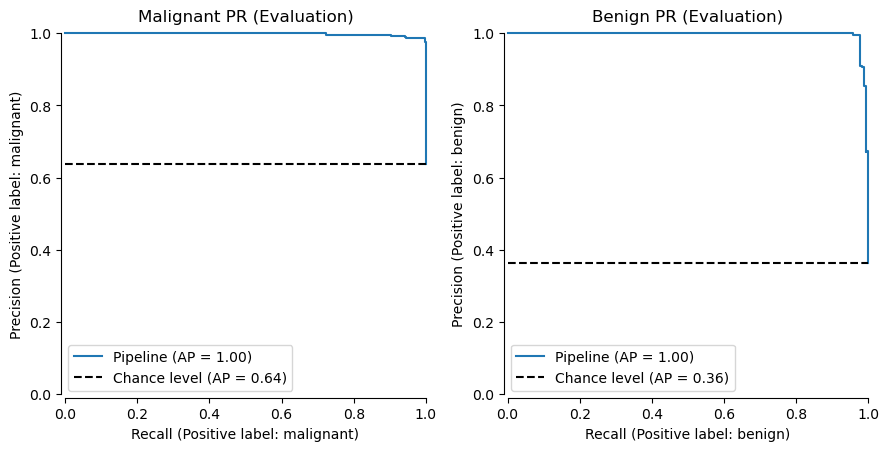

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(9, 9))
axs = axs.flatten()
count = 0
for label in train_labels:
    disp = PrecisionRecallDisplay.from_estimator(log_model, X_train, y_train, ax=axs[count], pos_label=label, plot_chance_level=True, despine=True)
    # disp.plot(ax=axs[count])
    disp.ax_.set_title(f"{label.capitalize()} PR (Evaluation)")
    count += 1

plt.tight_layout()
plt.show()

<h4><strong><u>Findings From 'Model Evaluation' Phase</u></strong></h4>
In the evaluation of my selected model, I found very good results for all evaluation methods. One thing to note is that there is an instance in the learning curve tests where the validation score was higher than the training score but I don't think that it is detrimental.

<h2><strong><u>Model Testing</u></strong></h2>

<h3><strong><u>Performance Metrics</u></strong></h3>

In [10]:
for key, value in clf_metrics.items():
    print(f"{key}")
    log_test_values = cross_val_score(log_model, X_test, y_test, scoring=value, cv=5)
    print(f"CV test Scores: ", log_test_values)
    np_log_test_values = np.array(log_test_values)
    average = np.mean(np_log_test_values)
    stDev = np.std(np_log_test_values)
    print(f"Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV test Scores:  [0.95652174 0.95652174 1.         0.95652174 0.90909091]
Average and Standard Error:  0.96% ± 2.88% 

Precision
CV test Scores:  [1.         0.92857143 1.         1.         0.86666667]
Average and Standard Error:  0.96% ± 5.38% 

Recall
CV test Scores:  [0.92307692 1.         1.         0.92857143 1.        ]
Average and Standard Error:  0.97% ± 3.64% 

Negative Predictive Value
CV test Scores:  [0.90909091 1.         1.         0.9        1.        ]
Average and Standard Error:  0.96% ± 4.69% 

Specificity
CV test Scores:  [1.         0.9        1.         1.         0.77777778]
Average and Standard Error:  0.94% ± 8.79% 



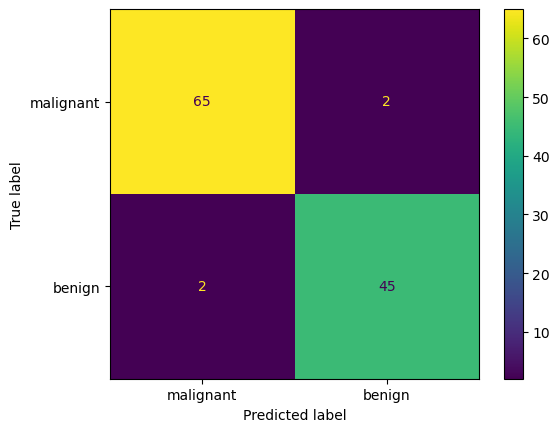

In [11]:
#Testing Confusion Matrix
test_predictions = log_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions, labels=['malignant', 'benign'])

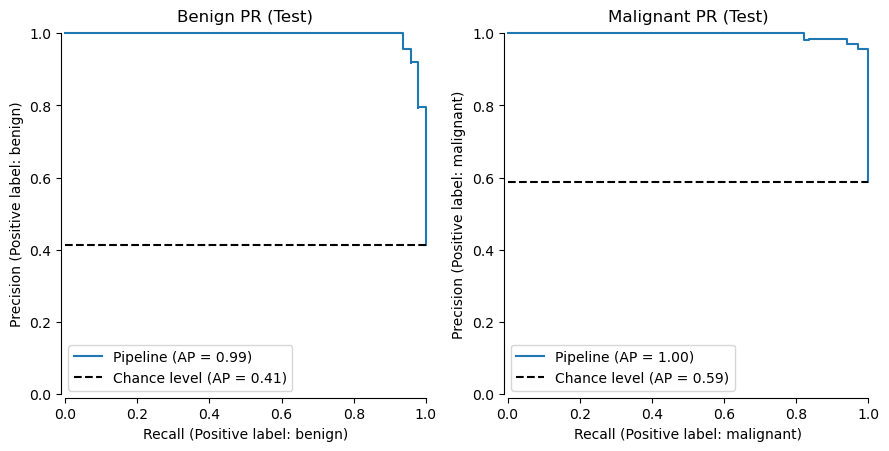

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(9, 9))
axs = axs.flatten()
count = 0
for label in test_labels:
    disp = PrecisionRecallDisplay.from_estimator(log_model, X_test, y_test, ax=axs[count], pos_label=label, plot_chance_level=True, despine=True)
    disp.ax_.set_title(f"{label.capitalize()} PR (Test)")
    count += 1

plt.tight_layout()  
plt.show()

<h4><strong><u>Findings From 'Model Testing' Phase</u></strong></h4>
In the testing phase of my selected model, I found that the testing results werein keeping with my results from the 'Model Evaluation' section. 

<h2><strong><u>Conclusion</u></strong></h2>
I will note that I would like to get my evaluation and test scores as close to 100% as possible. Considering the magnitude of the purpose of this model, we need to minimize False Positives and False Negative as much as possible because patients lives are at risks depending on these results. I will be looking into other models to compare them so that I can reach this goal.